## 加载数据集

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb

import numpy as np
import matplotlib.pyplot as plt

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 20

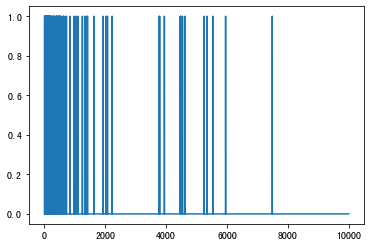

In [2]:
N = 10000

def multi_hot_encoding(sentences, dim=10000):
    results = np.zeros((len(sentences), dim))
    for i, word_indices in enumerate(sentences):
        results[i, word_indices] = 1.0
    return results


(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=N)
train_x = multi_hot_encoding(train_x)
test_x = multi_hot_encoding(test_x)

plt.plot(train_x[0])
plt.show()

## 训练三个模型

In [9]:
def build_and_train(hidden_dim, regularizer=None, dropout=0):
    model = keras.Sequential([
        keras.layers.Dense(hidden_dim, activation='relu', 
                           input_shape=(N,),
                           kernel_regularizer=regularizer),
        keras.layers.Dropout(dropout),
        keras.layers.Dense(hidden_dim, activation='relu',
                           kernel_regularizer=regularizer),
        keras.layers.Dropout(dropout),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy', 'binary_crossentropy'])
    history = model.fit(train_x, train_y, epochs=10, batch_size=512,
                        validation_data=(test_x, test_y), verbose=0)

    return history

In [4]:
baseline_history = build_and_train(16)
smaller_history = build_and_train(4)
larger_history = build_and_train(512)

W0712 01:48:29.105508 140735530943360 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## 绘图训练集和验证集损失

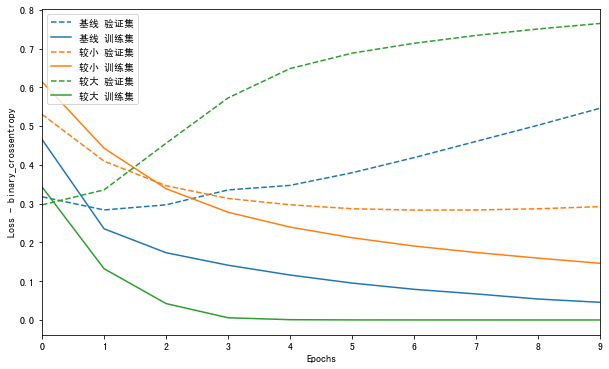

In [8]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(10, 6))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name + ' 验证集')
        plt.plot(history.epoch, history.history[key], 
                 color=val[0].get_color(), label=name + ' 训练集')

    plt.xlabel('Epochs')
    plt.ylabel('Loss - ' + key)
    plt.legend()

    plt.xlim([0, max(history.epoch)])

plot_history([('基线', baseline_history),
              ('较小', smaller_history),
              ('较大', larger_history)])

In [6]:
l2_model_history = build_and_train(16, keras.regularizers.l2(0.001))
dpt_model_history = build_and_train(16, dropout=0.2)

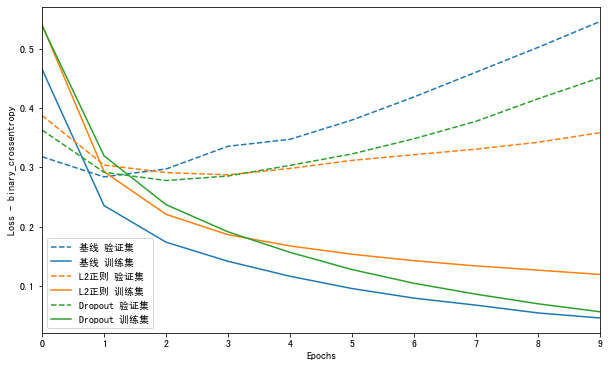

In [7]:
plot_history([('基线', baseline_history),
              ('L2正则', l2_model_history),
              ('Dropout', dpt_model_history)])